## Example suppnet usage

In [1]:
from suppnet import get_suppnet

In [2]:
help(get_suppnet)

Help on function get_suppnet in module suppnet.NN_utility:

get_suppnet(resampling_step=0.05, step_size=256, norm_only=True)
    Returns ProcessSpectrum object that can be used for pseudo-continuum prediction:
    continuum, continuum_error = nn.normalize(wave, flux)
    when norm_only=False:
    continuum, continuum_error, segmentation, segmentation_error = nn.normalize(wave, flux)



In [3]:
suppnet = get_suppnet(norm_only=False) # create suppnet instance

Start creating SUPPNet model!
SUPPNet model created!
Start loading weights!
SUPPNet (active)
Weights loaded!


### Load example data

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("../example_data/hd37495_F4V.dat", delim_whitespace=True, header=None)
df.columns = ["wave","flux","error"]
df.head()

,wave,flux,error
0,3039.853271,632.359376,34.517548
1,3039.865761,651.609692,33.042816
2,3039.878250,664.360254,33.595560
3,3039.890739,679.185090,32.908942
4,3039.903228,661.883727,32.310804


### Run SUPPNet

In [6]:
continuum, continuum_error, segmentation, segmentation_error = suppnet.normalize(df["wave"], df["flux"])

### Plot results

In [7]:
import matplotlib.pyplot as plt

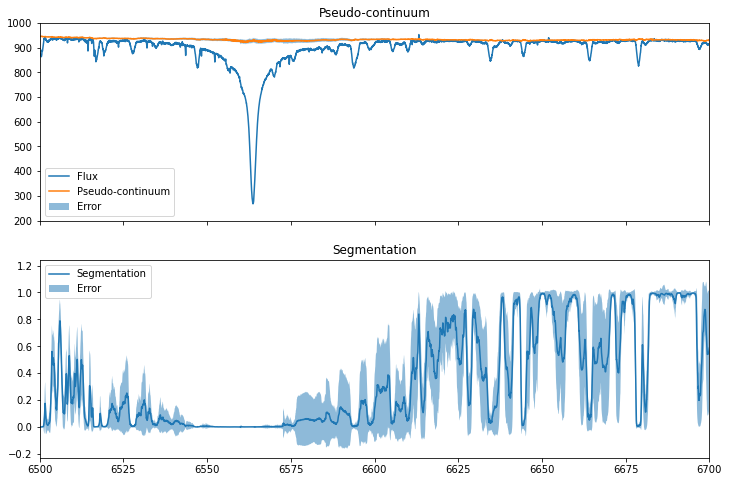

In [8]:
fig, axs = plt.subplots(2,figsize=(12,8),sharex=True)

axs[0].set_title("Pseudo-continuum")
axs[0].plot(df["wave"],df["flux"],label="Flux")
axs[0].plot(df["wave"],continuum,label="Pseudo-continuum")
axs[0].fill_between(df["wave"],
                   continuum-continuum_error,
                   continuum+continuum_error,
                    alpha=0.5,
                   label="Error")
axs[0].set_ylim(200,1000)
axs[0].legend()

axs[1].set_title("Segmentation")
axs[1].plot(df["wave"],segmentation,label="Segmentation")
axs[1].fill_between(df["wave"],
                   segmentation-segmentation_error,
                   segmentation+segmentation_error,
                    alpha=0.5,
                   label="Error")

axs[1].set_xlim(6500,6700)
axs[1].legend()